In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../../")

In [3]:
from topological_codes import TopologicalRegister, TopologicalCircuit
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

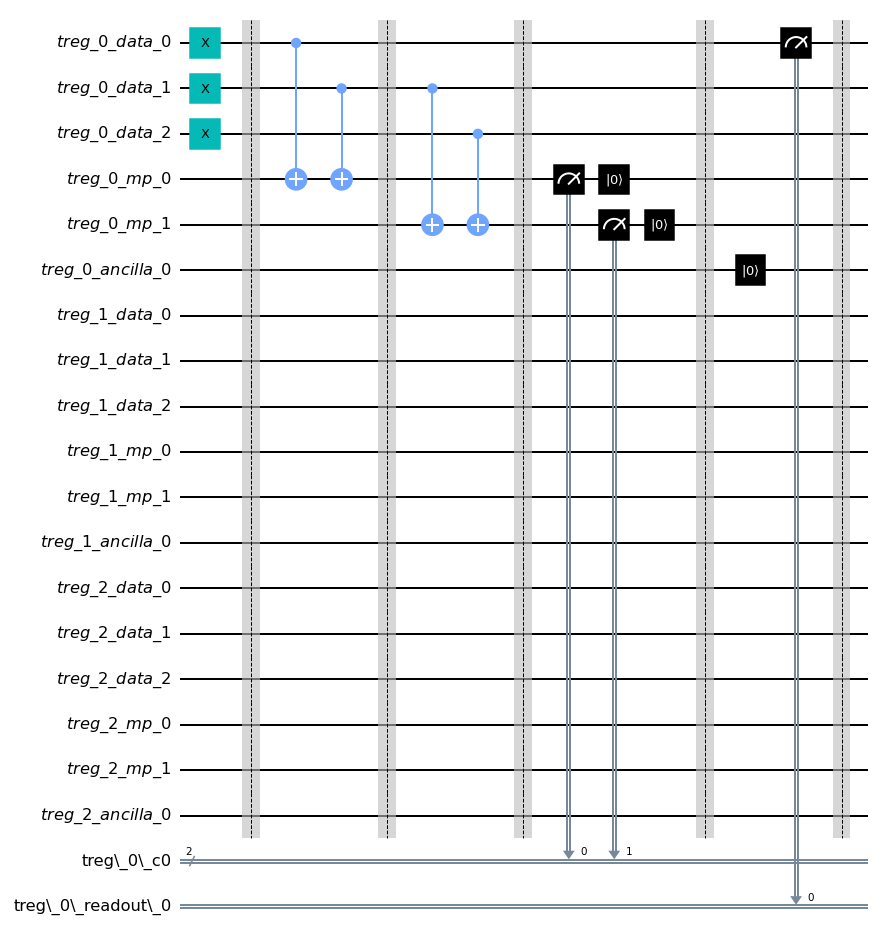

In [4]:
treg = TopologicalRegister(3, ctype="Repetition")
tcirc = TopologicalCircuit(treg)
tcirc.x(treg[0])
tcirc.stabilize(0)
tcirc.measure_z(0)
tcirc.draw(output='mpl', fold=500)

In [5]:
from qiskit import execute, Aer
def sim(circ):
    return execute(circ, 
                  Aer.get_backend("aer_simulator"), 
                  shots=10,
                 ).result().get_counts()

In [6]:
print(sim(tcirc.circ))

{'1 00': 10}


In [7]:
treg = TopologicalRegister(2, ctype="XXZZ")
tcirc = TopologicalCircuit(treg)

# prep state
tcirc.reset_z(0)
tcirc.reset_z(1)
tcirc.x(0)
tcirc.x(1)

# cnot
tcirc.cx(0,1)

# meas
tcirc.measure_z(0)
tcirc.measure_z(1)

# tcirc.draw(output='mpl', fold=500)

results = sim(tcirc.circ)
results = set([result[:3] for result in results.keys()])
print("q1 q0")
print(results)

q1 q0
{'0 1'}
